In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from astropy.time import Time
from astropy.table import Table
from nuztfpaper.style import output_folder, big_fontsize, base_width, base_height, dpi, plot_dir
from nuztfpaper.candidates import candidates
from nuztfpaper.alerts import obs, tot_nu_area
from nuztfpaper.stats import poisson_interval
import seaborn as sns
import json
from astropy.time import Time

/Users/robertstein/Code/ztf_nu_paper_code/nuztfpaper/alerts.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non["Rejection reason"][mask] = new
/Users/robertstein/Code/ztf_nu_paper_code/nuztfpaper/candidates.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates["base_class"][candidates["base_class"] == "AGN"] = "AGN Variability"


In [2]:
for nu in sorted(list(set(candidates["neutrino"]))):
    
    cands = candidates[candidates["neutrino"] == nu]

    text = r"""
    \begin{table*}
    \centering
        \begin{tabular}{||c | c c c ||} 
        \hline
        \textbf{ZTF Name} & \textbf{IAU Name} & \textbf{Classification} & \textbf{Peak Apparent Magnitude} \\
        \hline
    """

    for _, crow in cands.iterrows():
        
        iau = crow['IAU Name']
        if isinstance(iau, float):
            iau = "--"

        text += f"\t {crow['Name']} & {iau} & {crow['sub_class']} & {crow['max brightness']} \\\\ \n"


    text +=f"""
        \end{{tabular}}
        \caption{{Candidates for {nu}.}}
        \label{{tab:{str(nu.lower())}}}
    \end{{table*}}
    """

    print(text)
    
    


    \begin{table*}
    \centering
        \begin{tabular}{||c | c c c ||} 
        \hline
        \textbf{ZTF Name} & \textbf{IAU Name} & \textbf{Classification} & \textbf{Peak Apparent Magnitude} \\
        \hline
    	 ZTF19aatqcwq & -- & AGN Variability & 20.6 (g) \\ 
	 ZTF19aatqlwq & -- & AGN Variability & 21.2 (r) \\ 

        \end{tabular}
        \caption{Candidates for IC190503A.}
        \label{tab:ic190503a}
    \end{table*}
    

    \begin{table*}
    \centering
        \begin{tabular}{||c | c c c ||} 
        \hline
        \textbf{ZTF Name} & \textbf{IAU Name} & \textbf{Classification} & \textbf{Peak Apparent Magnitude} \\
        \hline
    	 ZTF18abolwbb & -- & AGN Variability & 19.4 (r) \\ 
	 ZTF18abueqkl & AT2020kqj & AGN Variability & 19.3 (g) \\ 
	 ZTF18acehkni & -- & AGN Variability & 19.4 (r) \\ 
	 ZTF18actxchc & -- & AGN Variability & 18.0 (g) \\ 
	 ZTF19aadaszg & SN2019rg & SN Ia & 15.9 (r) \\ 
	 ZTF19aawnawu & -- & AGN Variability & 20.0 (g) \\ 
	 ZTF19aaycone

In total there are 172 candidates from 24 neutrinos convering 154.33 sq. deg. This is a density of 1.11 candidates per sq. deg. of sky.
Artefact 17
Star 17
AGN Variability 84
After removing ['Artefact', 'Star', 'AGN Variability'], we are left with 54 candidates, a reduction of 68.6%. This leaves  0.35 good candidates per sq. deg. of sky.


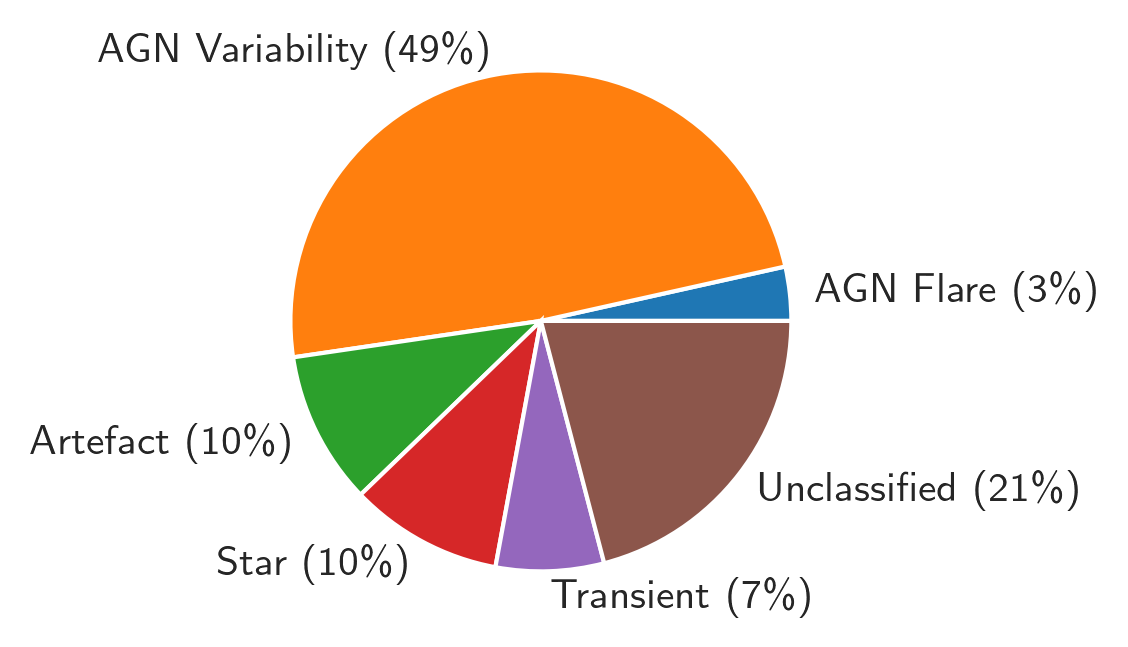

In [10]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

labels = []
sizes = []

labs = sorted(list(set(candidates["base_class"])))

for i, l in enumerate(labs):
    s = list(candidates["base_class"]).count(l)
    s = list(candidates["base_class"]).count(l)/len(candidates)
    sizes.append(s)
    labels.append(f"{l} ({100.*s:.0f}\%)")
    
def absolute_value(val):
    a  = np.round(val/100.*np.sum(sizes), 0)
    return int(a)

boring = ["Artefact", "Star", "AGN Variability"]

interesting_mask = [x not in boring for x in candidates["sub_class"]]

print(f"In total there are {len(candidates)} candidates from {len(obs)} neutrinos convering {tot_nu_area:.2f} sq. deg. " 
      f"This is a density of {float(len(candidates))/tot_nu_area:.2f} candidates per sq. deg. of sky.")

for x in boring:
    print(x, np.sum(candidates["sub_class"] == x))


print(f"After removing {boring}, we are left with {np.sum(interesting_mask)} candidates, "
      f"a reduction of {100. * (1. - np.sum(interesting_mask)/float(len(candidates))):.1f}%. "
      f"This leaves  {np.sum(interesting_mask)/tot_nu_area:.2f} good candidates per sq. deg. of sky."
     )

patches, texts = ax1.pie(sizes, 
                         labels=labels, 
                         textprops={'fontsize': big_fontsize}
                        )

ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

filename = "candidates.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(os.path.join(plot_dir, filename))
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

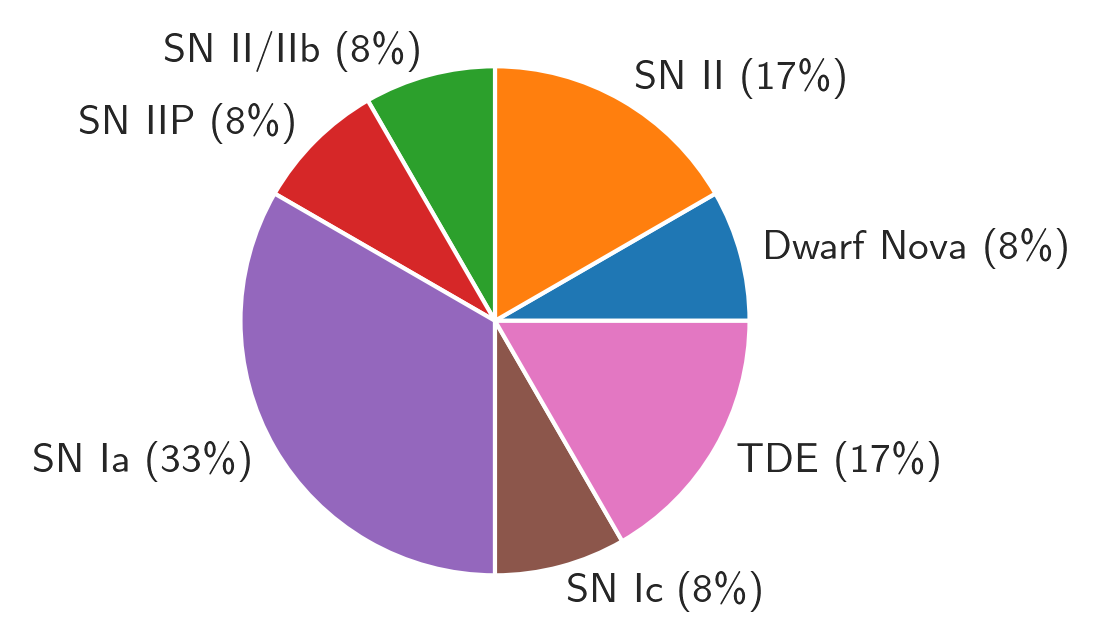

In [4]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

labels = []
sizes = []

e = 0.00

tranclass = candidates["sub_class"][candidates["base_class"] == "Transient"]

for x in list(set(tranclass)):
    if x not in labels:
        labels.append(x)
        
for i, l in enumerate(sorted(labels)):
    s = list(tranclass).count(l)/len(tranclass)
    sizes.append(s)
    labels[i] = f"{l} ({100.*s:.0f}\%)"
    
def absolute_value(val):
    a  = np.round(val/100.*np.sum(sizes), 0)
    return int(a)

patches, texts = ax1.pie(sizes, 
                         labels=labels, 
                         textprops={'fontsize': big_fontsize}
                        )

ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

filename = "transient_pie.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(os.path.join(plot_dir, filename))
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

There are 113 candidates fainter than 19.5, yielding an average classification efficiency of 68.1 %


/var/folders/hd/1411jr114w9cvmmnw9mx0xvr0000gn/T/ipykernel_49242/1646932283.py:42: RuntimeWarning: invalid value encountered in true_divide
  fs = (n[1] - n[0])/(n[1])


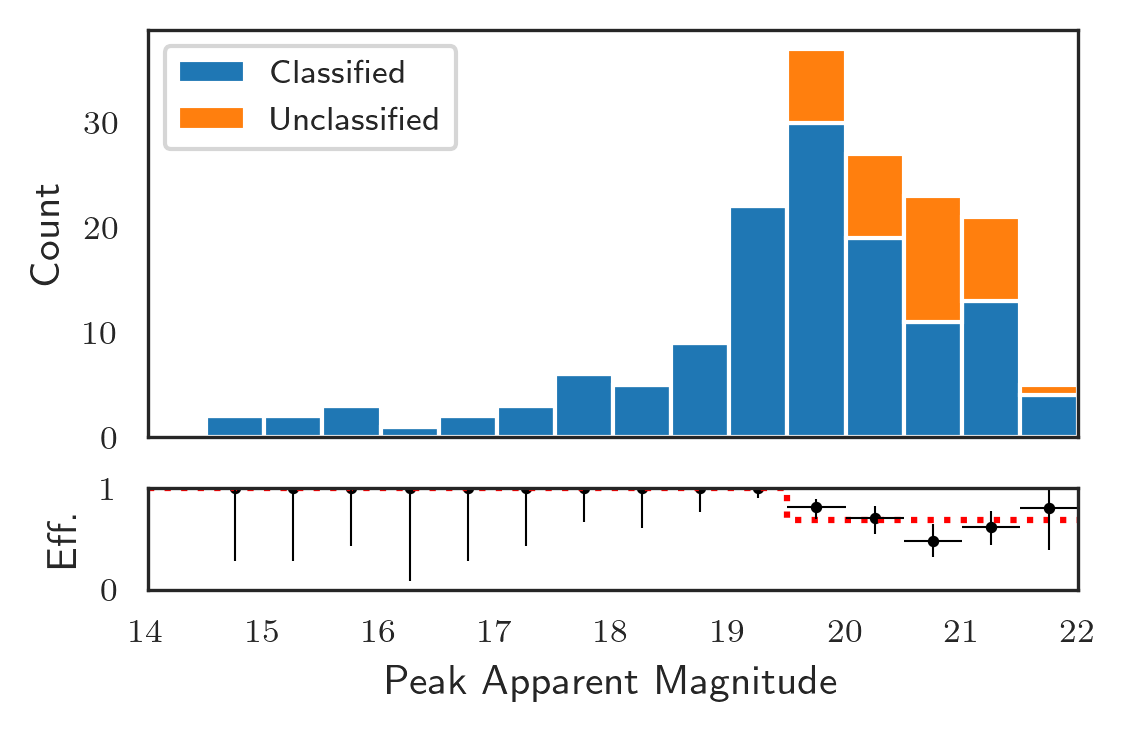

In [5]:
from scipy.stats import poisson

mask = np.array([x in ["Unclassified", "Unknown"] for x in candidates["base_class"]])

bins = np.linspace(14, 22, 17)
mids = 0.5*(bins[:-1] + bins[1:])

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot2grid((4, 1), (0, 0), colspan=3, rowspan=3)

n, _, _ = plt.hist(
    [candidates[~mask]["max_brightness"], candidates[mask]["max_brightness"]],
    label=["Classified", "Unclassified"],
    bins=bins,
    stacked=True
)

new_n = np.ones_like(n)
new_n[0] = n[1] - n[0]
new_n[1] = n[1]
n = new_n


cb = 19.5
mask = mids > cb
ncut = (n.T[mask]).T

av_eff = np.sum(ncut[1]-ncut[0])/np.sum(ncut[1])
print(f"There are {int(np.sum(ncut[1]))} candidates fainter than {cb}, " 
      f"yielding an average classification efficiency of {100.*av_eff:.1f} %")

ax1.set_ylabel("Count")

plt.legend()

ax2 = plt.subplot2grid((4, 1), (3, 0), colspan=3, rowspan=1, sharex=ax1)

ax2.plot([bins[0], cb, cb, bins[-1]], [1.0, 1.0, av_eff, av_eff], linestyle=":", color="r")

nclass = n[1] - n[0]

fs = (n[1] - n[0])/(n[1])
fs[np.isnan(fs)] = 1.

frac_unc_unclassified = np.array(poisson_interval(n[0], sigma=1))
frac_unc_classified = np.array(poisson_interval(nclass, sigma=1))

y_low = frac_unc_classified[0] /(frac_unc_classified[0] + frac_unc_unclassified[1])
y_high = frac_unc_classified[1] /(frac_unc_classified[1] + frac_unc_unclassified[0])

yerrs = np.zeros_like(frac_unc_unclassified)
yerrs[0] = fs - y_low
yerrs[1] = y_high-fs

yerrs[np.isnan(yerrs)] = 0.

mask = n[1] > 0. 

ax2.scatter(mids[mask], fs[mask], color="k", s=3.)
ax2.errorbar(mids[mask], fs[mask], yerr=(yerrs.T[mask]).T, color="k", linestyle=" ", xerr=0.25, elinewidth=0.5)
# ax2.plot(mids, fs, alpha=0.3, color="k", linestyle=":")
ax2.set_ylim(0.0, 1.0)
ax2.set_ylabel("Eff.")


xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlim(bins[0], bins[-1])
plt.subplots_adjust(hspace=0.5)

ax2.set_xlabel("Peak Apparent Magnitude", fontsize=big_fontsize)

filename = "completeness.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(os.path.join(plot_dir, filename))
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [6]:
# print(candidates[candidates["max_brightness"] > 21.5])

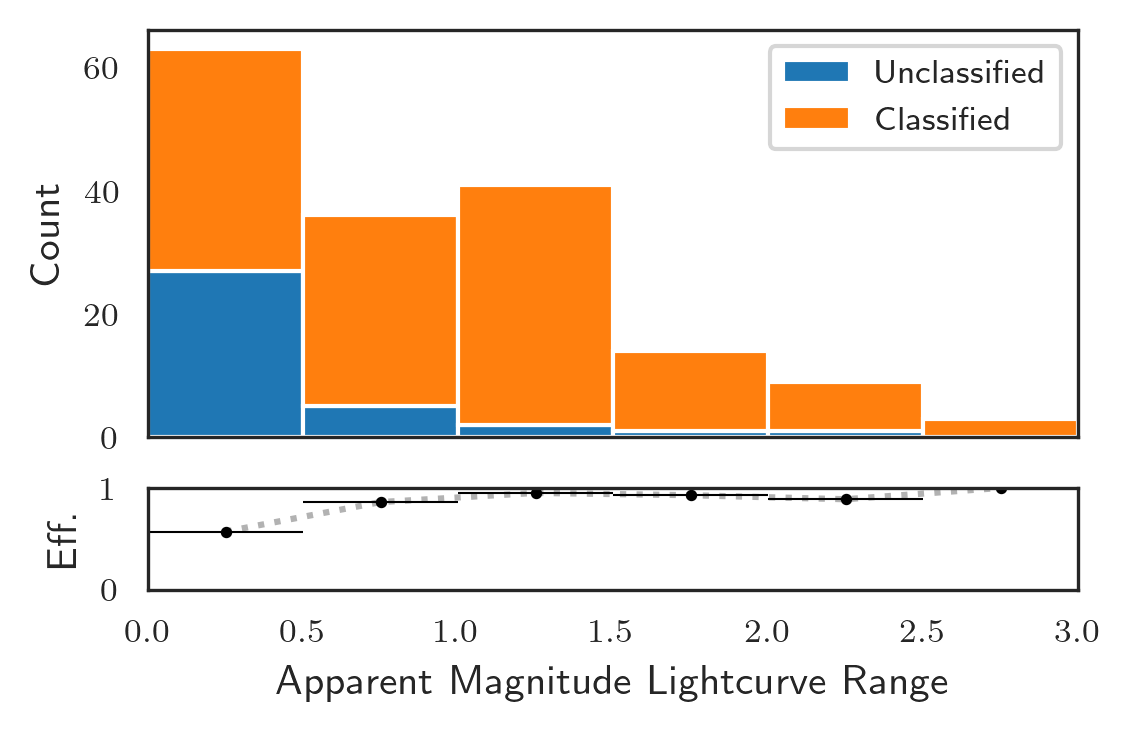

In [7]:
mask = np.array([x in ["Unclassified", "Unknown"] for x in candidates["base_class"]])


bins = np.linspace(0.0, 3.0, 7)
mids = 0.5*(bins[:-1] + bins[1:])

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot2grid((4, 1), (0, 0), colspan=3, rowspan=3)

n, _, _ = plt.hist(
    [list(candidates["max_range"][mask]), list(candidates["max_range"][~mask])],
    label=["Unclassified", "Classified"],
    bins=bins,
    stacked=True
)

ax1.set_ylabel("Count")

plt.legend()

ax2 = plt.subplot2grid((4, 1), (3, 0), colspan=3, rowspan=1, sharex=ax1)

fs = (n[1] - n[0])/(n[1])
fs[np.isnan(fs)] = 1.

ax2.scatter(mids, fs, color="k", s=3.)
ax2.errorbar(mids, fs, color="k", linestyle=" ", xerr=0.25, elinewidth=0.5)
ax2.plot(mids, fs, alpha=0.3, color="k", linestyle=":")
ax2.set_ylim(0.0, 1.0)
ax2.set_ylabel("Eff.")

xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlim(bins[0], bins[-1])
plt.subplots_adjust(hspace=0.5)

ax2.set_xlabel("Apparent Magnitude Lightcurve Range", fontsize=big_fontsize)

filename = "completeness_range.pdf"

output_path = os.path.join(output_folder, filename)
plt.savefig(os.path.join(plot_dir, filename))
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

Text(0.5, 0, 'Peak Apparent Magnitude')

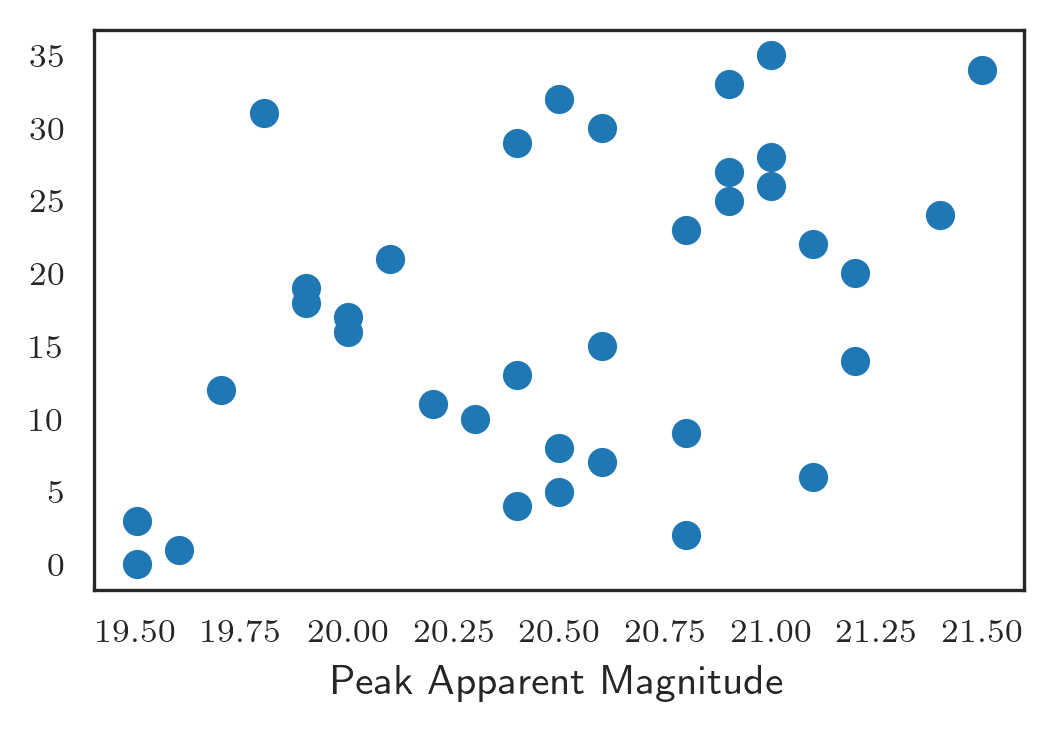

In [8]:
mask = candidates["base_class"] == "Unclassified"
unk = candidates[mask]

plt.figure(figsize=(base_width, base_height), dpi=dpi)
ax1 = plt.subplot(111)

plt.scatter(unk["max_brightness"], range(np.sum(mask)))
plt.xlabel("Peak Apparent Magnitude", fontsize=big_fontsize)

# output_path = os.path.join(output_folder, filename)
# plt.savefig(os.path.join(plot_dir, filename))
# plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

In [9]:
mask = ["AGN" in x for x in candidates["base_class"]]
agn = candidates[mask]

text=""

for _, c in candidates.iterrows():
    if c["base_class"] in ["AGN Flare", "Unknown", "Unclassified"]:
        text += f"{c['Name']}\n"
    
print(text)


ZTF19abahiwr
ZTF19abahiya
ZTF19abahlep
ZTF19abwaurq
ZTF19acbpqfn
ZTF19acbpqui
ZTF19acbxahc
ZTF19acbxanz
ZTF19acbxaqj
ZTF19acbxauk
ZTF19acbxbjq
ZTF19accnqlc
ZTF19acmwlds
ZTF20aaeuufe
ZTF20aaevfth
ZTF20aaevfwa
ZTF20aagwcuq
ZTF20aagwcuu
ZTF20aagwcuv
ZTF20aagxfta
ZTF19acxopgh
ZTF20aaglixd
ZTF18aavecmo
ZTF18abrwqpr
ZTF20aaxcdok
ZTF20abdnowp
ZTF20abdnoxm
ZTF20abdnoyu
ZTF20abdnpae
ZTF20abdnpbu
ZTF20abdrnlg
ZTF20acaapwn
ZTF20acaapwo
ZTF20aamoxyt
ZTF20acmxnpa
ZTF18abxrpgu
ZTF20acuqdeu
ZTF20acxbkpz
ZTF19aasfvqm
ZTF21aajxjrv
ZTF21aajxjry
ZTF20acinvxv

